# Censo Universitário - Análise de Parâmetros direcionados a UFPE 

In [9]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

dados = pd.read_csv(
    'SUP_ALUNO_2019.csv',
    encoding = "ISO-8859-1", 
    usecols=['NU_ANO_CENSO','CO_IES','NU_IDADE', 'TP_COR_RACA','TP_SEXO','IN_COMPLEMENTAR_PESQUISA', 'IN_BOLSA_PESQUISA','TP_ESCOLA_CONCLUSAO_ENS_MEDIO', 'IN_APOIO_BOLSA_PERMANENCIA', 'IN_APOIO_SOCIAL'],
    sep='|'
    )

---

## Verficamos que existem 36.748 alunos cadastrados no Censo Universitário vinculados a UFPE

In [10]:
# Recebe os dados dos alunos da UFPE segundo o número da universidade no Censo IES
alunos_ufpe = dados.loc[dados['CO_IES'] == 580]
n_alunos_ufpe = alunos_ufpe.count()[0]


36748


## O Censo classifica "Apoio Social" como sendo qualquer tipo de apoio financeiro na forma de moradia, transporta, alimentação, material didático e bolsas (trabalho e permanência).

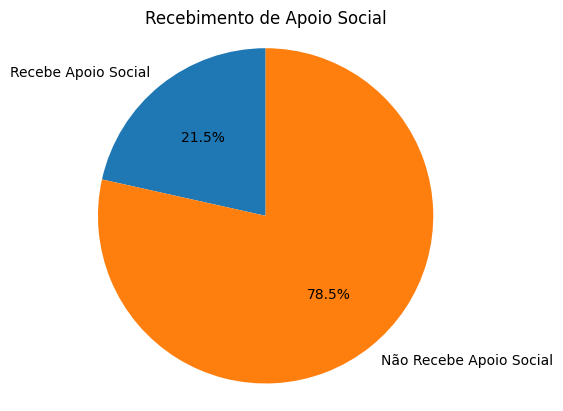

In [11]:
recebe_auxilio = alunos_ufpe.loc[alunos_ufpe['IN_APOIO_SOCIAL'] == 1]
qtd_recebe_auxilio = recebe_auxilio.count()[0]
nao_recebe_auxilio = alunos_ufpe.loc[alunos_ufpe['IN_APOIO_SOCIAL'] == 0]
qtd_nao_recebe_auxilio = nao_recebe_auxilio.count()[0]

labels = ['Recebe Apoio Social', 'Não recebe Apoio Social']
values = [qtd_recebe_auxilio, qtd_nao_recebe_auxilio]

fig1, ax1 = plt.subplots()

ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
plt.title('Recebimento de Apoio Social')
ax1.axis('equal')
plt.show()

### Percebemos com essa análise que dentro de uma amostragem de 36 mil alunos, é ainda pequeno o valor de alunos auxiiados pela universidade, tendo em vista a situação econômica do nosso país. A falta de incentivos fiscais para os alunos estudarem ainda é um problema...

## Dentro dos alunos que recebem Apoio Social, Temos a análise diante das respectivas autodenominações raciais.

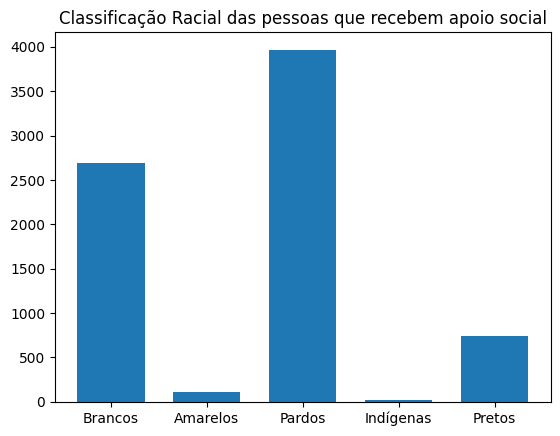

In [12]:
brancos_auxiliados = recebe_auxilio.loc[recebe_auxilio['TP_COR_RACA']==1]
pretos_auxiliados = recebe_auxilio.loc[recebe_auxilio['TP_COR_RACA']==2]
pardos_auxiliados = recebe_auxilio.loc[recebe_auxilio['TP_COR_RACA']==3]
amarelos_auxiliados = recebe_auxilio.loc[recebe_auxilio['TP_COR_RACA']==4]
indigenas_auxiliados = recebe_auxilio.loc[recebe_auxilio['TP_COR_RACA']==5]

qtd_brancos_auxiliados = brancos_auxiliados.count()[0]
qtd_pretos_auxiliados = pretos_auxiliados.count()[0]
qtd_pardos_auxiliados = pardos_auxiliados.count()[0]
qtd_amarelos_auxiliados = amarelos_auxiliados.count()[0]
qtd_indigenas_auxiliados = indigenas_auxiliados.count()[0]



labels = ['Brancos', 'Amarelos', 'Pardos', 'Indígenas', 'Pretos']
values = [qtd_brancos_auxiliados,qtd_amarelos_auxiliados,qtd_pardos_auxiliados,qtd_indigenas_auxiliados,qtd_pretos_auxiliados]

plt.bar(labels, values, width=0.7)
plt.title('Classificação racial das pessoas que recebem apoio social')
plt.show()

---

## Outra análise pertinente é o percentual de alunos dentro da UFPE que se encontram em situação de vulnerabilidade socioeconômica ou pertencentes a grupos étnicos específicos. Esse Alunos São Apoiados pela Bolsa Permanência.

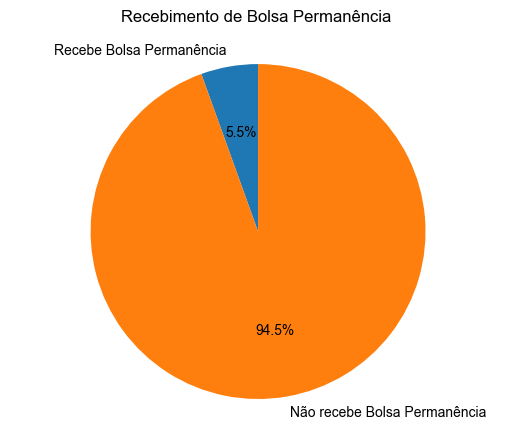

In [13]:
bolsa_permanencia = alunos_ufpe.loc[alunos_ufpe['IN_APOIO_BOLSA_PERMANENCIA']==1]
n_bolsa_permanencia = alunos_ufpe.loc[alunos_ufpe['IN_APOIO_BOLSA_PERMANENCIA']==0]

qtd_bolsa_permanencia = bolsa_permanencia.count()[0]
qtd_n_bolsa_permanencia = n_bolsa_permanencia.count()[0]

labels = ['Recebe Bolsa Permanência', 'Não recebe Bolsa Permanência']
values = [qtd_n_bolsa_permanencia,qtd_bolsa_permanencia]

fig1, ax1 = plt.subplots()

ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)

ax1.axis('equal')
plt.style.use('seaborn-darkgrid')
plt.title('Recebimento de Bolsa Permanência \n')
plt.show()

### A partir dessa análise, podemos concluir que esse auxílio tão importante também deve ser expandido pela universidade. Pessoas dentro do nosso grupo tiveram experiências com esse tipo de auxílio não sendo disponibilizado para pessoas que necessitam por falta de vagas, a situação é grave!

---

## Por fim uma análise mais voltada para Pesquisa dentro da UFPE, foi perguntado aos alunos que participaram do censo se eles realizavam algum tipo de atividade extracurrilcular voltado para pesquisa e a resposta foi a seguinte:

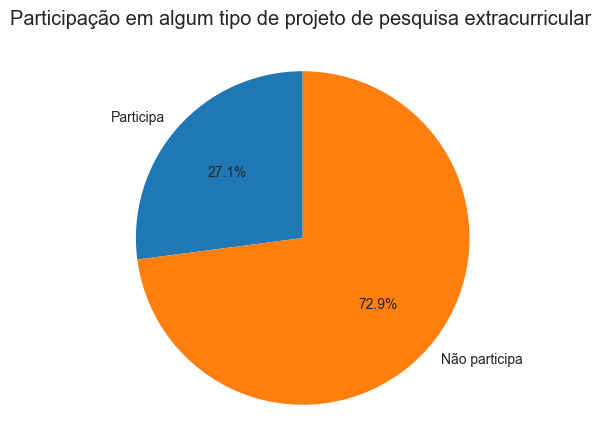

In [14]:
pesquisa = alunos_ufpe.loc[alunos_ufpe['IN_COMPLEMENTAR_PESQUISA']==1]
n_pesquisa = alunos_ufpe.loc[alunos_ufpe['IN_COMPLEMENTAR_PESQUISA']==0]

qtd_pesquisa = pesquisa.count()[0]
qtd_n_pesquisa = n_pesquisa.count()[0]
labels = ['Participa', 'Não participa']
values = [qtd_pesquisa,qtd_n_pesquisa]

fig1, ax1 = plt.subplots()

ax1.pie(values, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)

ax1.axis('equal')
plt.style.use('ggplot')
plt.title('Participação em algum tipo de projeto de pesquisa extracurricular \n')
plt.show()

### Essa informação é bem grave dado que um dos principais intuitos de uma Universidade é pesquisar e fazer ciência. Isso mostra a falta de incentivo dentro da nossa universidade para que os alunos façam ciência e até a pressão de carga horária que não propicia tempo suficiente para os alunos pesquisarem.

## Dentro da análise acima, temos que um número expressivo de alunos ainda realiza pesquisa sem nenhum tipo de incentivo econômico. O amor a ciência é o suficiente para mover o estudante mas precisamos de AUXÍLIO.

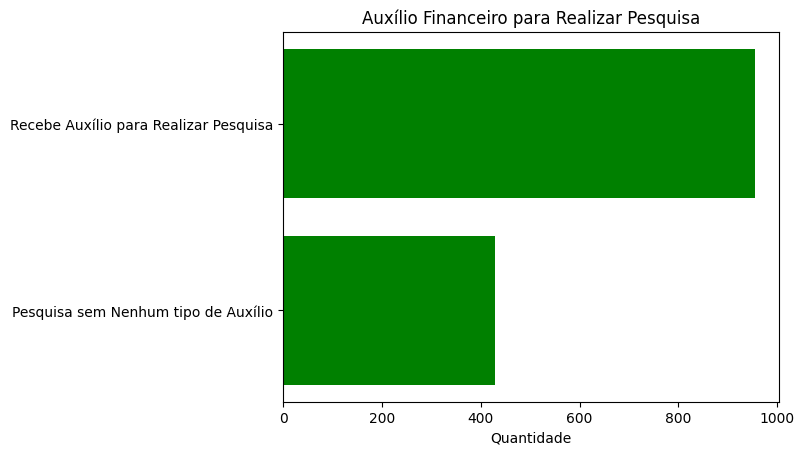

In [15]:
bolsa_pesquisa = pesquisa.loc[pesquisa['IN_BOLSA_PESQUISA']==1]
n_bolsa_pesquisa = pesquisa.loc[pesquisa['IN_BOLSA_PESQUISA']==0]

qtd_bolsa_pesquisa = bolsa_pesquisa.count()[0]
qtd_n_bolsa_pesquisa = n_bolsa_pesquisa.count()[0]

labels = ['Recebe auxílio para realizar pesquisa', 'Pesquisa sem nenhum tipo de auxílio']
values = [qtd_bolsa_pesquisa,qtd_n_bolsa_pesquisa]

plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(labels))

ax.barh(y_pos, values, align='center', color='g')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis() 
ax.set_xlabel('Quantidade')
ax.set_title('Auxílio financeiro para realizar pesquisa')

plt.show()